https://pytorch.org/docs/master/jit.html \
https://pytorch.org/tutorials/advanced/cpp_export.html

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

## Данные и модель

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([32, 3, 300, 300])


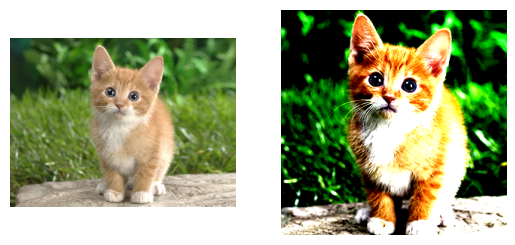

In [2]:
from get_image import get_image
image, tensor, input = get_image()

from get_model import get_model
torch_model = get_model()

In [3]:
import torch

def test(model: torch.nn.Module) -> float:
    return model(input).cpu()[0]

torch_output = test(torch_model)
print(torch_output.argmax())
torch_output[0:7]

tensor(282)


tensor([-1.0213, -0.3629, -1.1130, -1.0600, -0.3761, -1.1208, -0.3966],
       grad_fn=<SliceBackward0>)

## Tracing

In [ ]:
traced_model = torch.jit.trace(torch_model, input)
torch.allclose(test(traced_model), torch_output)

In [ ]:
traced_model.save("traced.pt")

## Scripting

### Problem

In [ ]:
class TestModule(torch.nn.Module):
    def forward(self, input):
        if input.sum() > 0: return input.max(dim = 1).values
        else: return input.min(dim = 1).values
    
input1 = torch.tensor([ [ 1., 2. ], [ 3., 4. ] ])
input2 = torch.tensor([ [ 1., 2. ], [ -3., -4. ] ])

In [ ]:
test_module = TestModule()
print(test_module(input1))
print(test_module(input2))

In [ ]:
traced_test_module_1 = torch.jit.trace(test_module, input1)
print(traced_test_module_1(input1))
print(traced_test_module_1(input2))

In [ ]:
traced_test_module_2 = torch.jit.trace(test_module, input2)
print(traced_test_module_2(input1))
print(traced_test_module_2(input2))

### Solution

In [ ]:
scripted_test_module = torch.jit.script(test_module)
print(scripted_test_module(input1))
print(scripted_test_module(input2))

In [ ]:
scripted_model = torch.jit.script(torch_model)
torch.allclose(test(scripted_model), torch_output)

In [ ]:
scripted_model.save("scripted.pt")

torch.jit.freeze() \
torch.jit.optimized_execution() \
https://pytorch.org/docs/stable/generated/torch.jit.optimize_for_inference.html#torch.jit.optimize_for_inference